In [205]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
# URL of the Wikipedia page
url = "https://id.wikipedia.org/wiki/Daftar_kabupaten_dan_kota_di_Indonesia"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [207]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="id">
<head>
<meta charset="utf-8"/>
<title>Daftar kabupaten dan kota di Indonesia - Wikipedia bahasa Indonesia, ensiklopedia bebas</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientp

In [208]:
# Find the table with the specified classes using the attrs dictionary
table = soup.find('table', attrs={'class': 'wikitable sortable mw-collapsible'})

# Print the table
print(table)

<table class="wikitable sortable mw-collapsible">
<tbody><tr>
<th>No.
</th>
<th>Kabupaten/kota
</th>
<th>Ibu kota
</th>
<th>Bupati/wali kota
</th>
<th>Luas wilayah (km<sup>2</sup>)<sup class="reference" id="cite_ref-:0aceh_2-0"><a href="#cite_note-:0aceh-2">[2]</a></sup>
</th>
<th>Jumlah penduduk (2022)
</th>
<th>Kecamatan
</th>
<th>Gampong
</th>
<th>Lambang <figure class="mw-halign-center" typeof="mw:File"><a class="mw-file-description" href="/wiki/Berkas:Coat_of_arms_of_Aceh.svg"><img alt="" class="mw-file-element" data-file-height="516" data-file-width="506" decoding="async" height="51" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/50px-Coat_of_arms_of_Aceh.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/75px-Coat_of_arms_of_Aceh.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/100px-Coat_of_arms_of_Aceh.svg.png 2x" width="50"/></a><figcaption></figcaption></fi

In [209]:
table = soup.find_all('table')[1]

In [210]:
print(table)

<table class="wikitable sortable mw-collapsible">
<tbody><tr>
<th>No.
</th>
<th>Kabupaten/kota
</th>
<th>Ibu kota
</th>
<th>Bupati/wali kota
</th>
<th>Luas wilayah (km<sup>2</sup>)<sup class="reference" id="cite_ref-:0aceh_2-0"><a href="#cite_note-:0aceh-2">[2]</a></sup>
</th>
<th>Jumlah penduduk (2022)
</th>
<th>Kecamatan
</th>
<th>Gampong
</th>
<th>Lambang <figure class="mw-halign-center" typeof="mw:File"><a class="mw-file-description" href="/wiki/Berkas:Coat_of_arms_of_Aceh.svg"><img alt="" class="mw-file-element" data-file-height="516" data-file-width="506" decoding="async" height="51" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/50px-Coat_of_arms_of_Aceh.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/75px-Coat_of_arms_of_Aceh.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/100px-Coat_of_arms_of_Aceh.svg.png 2x" width="50"/></a><figcaption></figcaption></fi

In [211]:
#find all tables head
df_titles = table.find_all('th')

In [212]:
df_titles 

[<th>No.
 </th>,
 <th>Kabupaten/kota
 </th>,
 <th>Ibu kota
 </th>,
 <th>Bupati/wali kota
 </th>,
 <th>Luas wilayah (km<sup>2</sup>)<sup class="reference" id="cite_ref-:0aceh_2-0"><a href="#cite_note-:0aceh-2">[2]</a></sup>
 </th>,
 <th>Jumlah penduduk (2022)
 </th>,
 <th>Kecamatan
 </th>,
 <th>Gampong
 </th>,
 <th>Lambang <figure class="mw-halign-center" typeof="mw:File"><a class="mw-file-description" href="/wiki/Berkas:Coat_of_arms_of_Aceh.svg"><img alt="" class="mw-file-element" data-file-height="516" data-file-width="506" decoding="async" height="51" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/50px-Coat_of_arms_of_Aceh.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/75px-Coat_of_arms_of_Aceh.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/100px-Coat_of_arms_of_Aceh.svg.png 2x" width="50"/></a><figcaption></figcaption></figure>
 </th>,
 <th>Peta lokasi
 </th>

In [213]:
table_titles = [title.text.strip() for title in df_titles]

print(table_titles)

['No.', 'Kabupaten/kota', 'Ibu kota', 'Bupati/wali kota', 'Luas wilayah (km2)[2]', 'Jumlah penduduk (2022)', 'Kecamatan', 'Gampong', 'Lambang', 'Peta lokasi']


In [214]:
df = pd.DataFrame(columns=table_titles)
df

,No.,Kabupaten/kota,Ibu kota,Bupati/wali kota,Luas wilayah (km2)[2],Jumlah penduduk (2022),Kecamatan,Gampong,Lambang,Peta lokasi


In [215]:
column_df = table.find_all('tr')
column_df

[<tr>
 <th>No.
 </th>
 <th>Kabupaten/kota
 </th>
 <th>Ibu kota
 </th>
 <th>Bupati/wali kota
 </th>
 <th>Luas wilayah (km<sup>2</sup>)<sup class="reference" id="cite_ref-:0aceh_2-0"><a href="#cite_note-:0aceh-2">[2]</a></sup>
 </th>
 <th>Jumlah penduduk (2022)
 </th>
 <th>Kecamatan
 </th>
 <th>Gampong
 </th>
 <th>Lambang <figure class="mw-halign-center" typeof="mw:File"><a class="mw-file-description" href="/wiki/Berkas:Coat_of_arms_of_Aceh.svg"><img alt="" class="mw-file-element" data-file-height="516" data-file-width="506" decoding="async" height="51" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/50px-Coat_of_arms_of_Aceh.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/75px-Coat_of_arms_of_Aceh.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/41/Coat_of_arms_of_Aceh.svg/100px-Coat_of_arms_of_Aceh.svg.png 2x" width="50"/></a><figcaption></figcaption></figure>
 </th>
 <th>Peta lokasi
 </th></t

In [216]:
for row in column_df[1:]:

    # find all the tables 
    row_df = row.find_all('td')

    #extract text from each table and remove whitespace
    each_row_df = [data.text.strip() for data in row_df]

    #length of dataframe
    length = len(df)

    #add row to dataframe with extract data 
    df.loc[length] = each_row_df

In [217]:
df

,No.,Kabupaten/kota,Ibu kota,Bupati/wali kota,Luas wilayah (km2)[2],Jumlah penduduk (2022),Kecamatan,Gampong,Lambang,Peta lokasi
0,1,Kabupaten Aceh Barat,Meulaboh,Mahdi Efendi (Pj.),"2.782,87",198.858,12,322,,
1,2,Kabupaten Aceh Barat Daya,Blangpidie,Darmansah (Pj.),"1.882,28",153.515,9,152,,
2,3,Kabupaten Aceh Besar,Kota Jantho,Muhammad Iswanto (Pj.),"2.891,48",422.241,23,604,,
3,4,Kabupaten Aceh Jaya,Calang,A. Murtala (Pj.),"3.872,35",96.049,9,172,,
4,5,Kabupaten Aceh Selatan,Tapak Tuan,Cut Syazalisma (Pj.),"4.175,38",234.169,18,260,,
5,6,Kabupaten Aceh Singkil,Singkil,Azmi (Pj.),"1.852,82",129.674,11,116,,
6,7,Kabupaten Aceh Tamiang,Karang Baru,Asra (Pj.),"2.187,66",301.800,12,216,,
7,8,Kabupaten Aceh Tengah,Takengon,Teuku Mirzuan (Pj.),"4.468,42",219.744,14,295,,
8,9,Kabupaten Aceh Tenggara,Kutacane,Syakir (Pj.),"4.179,12",227.921,16,385,,
9,10,Kabupaten Aceh Timur,Idi Rayeuk,Mahyuddin (Pj.),"6.040,6",434.929,24,513,,


In [218]:
# Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Add extra headers for the image URLs
headers.extend(['Lambang URL', 'Peta Lokasi URL'])

# Create a DataFrame to store the data
df = pd.DataFrame(columns=headers)

# Iterate over the table rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) > 0:
        # Extract text from each column
        row_data = [col.text.strip() for col in columns]

        # Extract "Lambang" image URL
        lambang_tag = columns[8].find('img')
        if lambang_tag:
            lambang_url = 'https:' + lambang_tag['src']
        else:
            lambang_url = None

        # Extract "Peta Lokasi" image URL
        peta_lokasi_tag = columns[9].find('img')
        if peta_lokasi_tag:
            peta_lokasi_url = 'https:' + peta_lokasi_tag['src']
        else:
            peta_lokasi_url = None

        # Append image URLs to row data
        row_data.append(lambang_url)
        row_data.append(peta_lokasi_url)

        # Append the row data to the DataFrame
        if len(row_data) == len(headers):  # Ensure row_data matches the number of headers
            df.loc[len(df)] = row_data

# Display the DataFrame
df


,No.,Kabupaten/kota,Ibu kota,Bupati/wali kota,Luas wilayah (km2)[2],Jumlah penduduk (2022),Kecamatan,Gampong,Lambang,Peta lokasi,Lambang URL,Peta Lokasi URL
0,1,Kabupaten Aceh Barat,Meulaboh,Mahdi Efendi (Pj.),"2.782,87",198.858,12,322,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
1,2,Kabupaten Aceh Barat Daya,Blangpidie,Darmansah (Pj.),"1.882,28",153.515,9,152,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
2,3,Kabupaten Aceh Besar,Kota Jantho,Muhammad Iswanto (Pj.),"2.891,48",422.241,23,604,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
3,4,Kabupaten Aceh Jaya,Calang,A. Murtala (Pj.),"3.872,35",96.049,9,172,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
4,5,Kabupaten Aceh Selatan,Tapak Tuan,Cut Syazalisma (Pj.),"4.175,38",234.169,18,260,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
5,6,Kabupaten Aceh Singkil,Singkil,Azmi (Pj.),"1.852,82",129.674,11,116,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
6,7,Kabupaten Aceh Tamiang,Karang Baru,Asra (Pj.),"2.187,66",301.800,12,216,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
7,8,Kabupaten Aceh Tengah,Takengon,Teuku Mirzuan (Pj.),"4.468,42",219.744,14,295,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
8,9,Kabupaten Aceh Tenggara,Kutacane,Syakir (Pj.),"4.179,12",227.921,16,385,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
9,10,Kabupaten Aceh Timur,Idi Rayeuk,Mahyuddin (Pj.),"6.040,6",434.929,24,513,,,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...


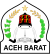

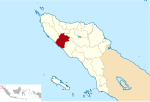

No.                                                                       1
Kabupaten/kota                                         Kabupaten Aceh Barat
Ibu kota                                                           Meulaboh
Bupati/wali kota                                         Mahdi Efendi (Pj.)
Luas wilayah (km2)[2]                                              2.782,87
Jumlah penduduk (2022)                                              198.858
Kecamatan                                                                12
Gampong                                                                 322
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 0, dtype: object


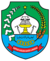

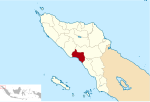

No.                                                                       2
Kabupaten/kota                                    Kabupaten Aceh Barat Daya
Ibu kota                                                         Blangpidie
Bupati/wali kota                                            Darmansah (Pj.)
Luas wilayah (km2)[2]                                              1.882,28
Jumlah penduduk (2022)                                              153.515
Kecamatan                                                                 9
Gampong                                                                 152
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 1, dtype: object


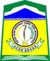

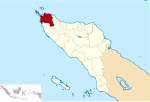

No.                                                                       3
Kabupaten/kota                                         Kabupaten Aceh Besar
Ibu kota                                                        Kota Jantho
Bupati/wali kota                                     Muhammad Iswanto (Pj.)
Luas wilayah (km2)[2]                                              2.891,48
Jumlah penduduk (2022)                                              422.241
Kecamatan                                                                23
Gampong                                                                 604
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 2, dtype: object


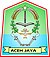

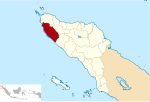

No.                                                                       4
Kabupaten/kota                                          Kabupaten Aceh Jaya
Ibu kota                                                             Calang
Bupati/wali kota                                           A. Murtala (Pj.)
Luas wilayah (km2)[2]                                              3.872,35
Jumlah penduduk (2022)                                               96.049
Kecamatan                                                                 9
Gampong                                                                 172
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 3, dtype: object


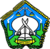

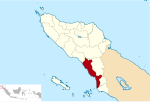

No.                                                                       5
Kabupaten/kota                                       Kabupaten Aceh Selatan
Ibu kota                                                         Tapak Tuan
Bupati/wali kota                                       Cut Syazalisma (Pj.)
Luas wilayah (km2)[2]                                              4.175,38
Jumlah penduduk (2022)                                              234.169
Kecamatan                                                                18
Gampong                                                                 260
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 4, dtype: object


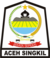

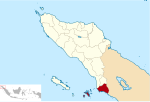

No.                                                                       6
Kabupaten/kota                                       Kabupaten Aceh Singkil
Ibu kota                                                            Singkil
Bupati/wali kota                                                 Azmi (Pj.)
Luas wilayah (km2)[2]                                              1.852,82
Jumlah penduduk (2022)                                              129.674
Kecamatan                                                                11
Gampong                                                                 116
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 5, dtype: object


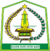

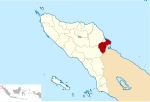

No.                                                                       7
Kabupaten/kota                                       Kabupaten Aceh Tamiang
Ibu kota                                                        Karang Baru
Bupati/wali kota                                                 Asra (Pj.)
Luas wilayah (km2)[2]                                              2.187,66
Jumlah penduduk (2022)                                              301.800
Kecamatan                                                                12
Gampong                                                                 216
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 6, dtype: object


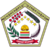

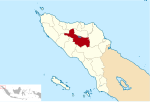

No.                                                                       8
Kabupaten/kota                                        Kabupaten Aceh Tengah
Ibu kota                                                           Takengon
Bupati/wali kota                                        Teuku Mirzuan (Pj.)
Luas wilayah (km2)[2]                                              4.468,42
Jumlah penduduk (2022)                                              219.744
Kecamatan                                                                14
Gampong                                                                 295
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 7, dtype: object


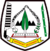

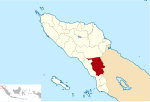

No.                                                                       9
Kabupaten/kota                                      Kabupaten Aceh Tenggara
Ibu kota                                                           Kutacane
Bupati/wali kota                                               Syakir (Pj.)
Luas wilayah (km2)[2]                                              4.179,12
Jumlah penduduk (2022)                                              227.921
Kecamatan                                                                16
Gampong                                                                 385
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 8, dtype: object


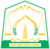

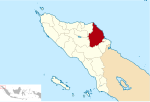

No.                                                                      10
Kabupaten/kota                                         Kabupaten Aceh Timur
Ibu kota                                                         Idi Rayeuk
Bupati/wali kota                                            Mahyuddin (Pj.)
Luas wilayah (km2)[2]                                               6.040,6
Jumlah penduduk (2022)                                              434.929
Kecamatan                                                                24
Gampong                                                                 513
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 9, dtype: object


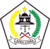

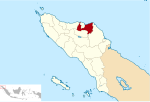

No.                                                                      11
Kabupaten/kota                                         Kabupaten Aceh Utara
Ibu kota                                                          Lhoksukon
Bupati/wali kota                                       Mahyuzar Reuby (Pj.)
Luas wilayah (km2)[2]                                              2.705,26
Jumlah penduduk (2022)                                              609.705
Kecamatan                                                                27
Gampong                                                                 852
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 10, dtype: object


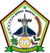

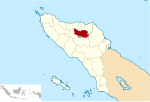

No.                                                                      12
Kabupaten/kota                                       Kabupaten Bener Meriah
Ibu kota                                              Simpang Tiga Redelong
Bupati/wali kota                                           Haili Yoga (Pj.)
Luas wilayah (km2)[2]                                              1.907,40
Jumlah penduduk (2022)                                              168.469
Kecamatan                                                                10
Gampong                                                                 232
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 11, dtype: object


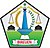

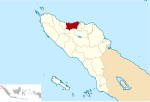

No.                                                                      13
Kabupaten/kota                                            Kabupaten Bireuen
Ibu kota                                                            Bireuen
Bupati/wali kota                                         Aulia Sofyan (Pj.)
Luas wilayah (km2)[2]                                              1.796,99
Jumlah penduduk (2022)                                              445.503
Kecamatan                                                                17
Gampong                                                                 609
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 12, dtype: object


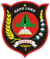

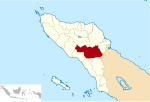

No.                                                                      14
Kabupaten/kota                                          Kabupaten Gayo Lues
Ibu kota                                                      Blang Kejeren
Bupati/wali kota                                      Syaridin Porang (Pj.)
Luas wilayah (km2)[2]                                              5.541,29
Jumlah penduduk (2022)                                              101.955
Kecamatan                                                                11
Gampong                                                                 136
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 13, dtype: object


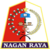

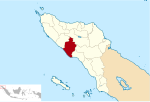

No.                                                                      15
Kabupaten/kota                                         Kabupaten Nagan Raya
Ibu kota                                                        Suka Makmue
Bupati/wali kota                                      Fitriany Farhas (Pj.)
Luas wilayah (km2)[2]                                              3.524,16
Jumlah penduduk (2022)                                              172.827
Kecamatan                                                                10
Gampong                                                                 222
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 14, dtype: object


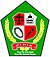

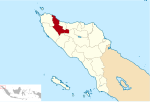

No.                                                                      16
Kabupaten/kota                                              Kabupaten Pidie
Ibu kota                                                              Sigli
Bupati/wali kota                                  Wahyudi Adisiswanto (Pj.)
Luas wilayah (km2)[2]                                              3.177,49
Jumlah penduduk (2022)                                              436.796
Kecamatan                                                                23
Gampong                                                                 730
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 15, dtype: object


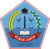

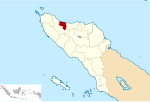

No.                                                                      17
Kabupaten/kota                                         Kabupaten Pidie Jaya
Ibu kota                                                           Meureudu
Bupati/wali kota                                        Said Mulyadi (Plt.)
Luas wilayah (km2)[2]                                                939,00
Jumlah penduduk (2022)                                              160.272
Kecamatan                                                                 8
Gampong                                                                 222
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 16, dtype: object


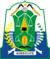

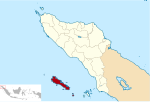

No.                                                                      18
Kabupaten/kota                                           Kabupaten Simeulue
Ibu kota                                                           Sinabang
Bupati/wali kota                                            Ahmadlyah (Pj.)
Luas wilayah (km2)[2]                                              1.821,75
Jumlah penduduk (2022)                                               94.560
Kecamatan                                                                10
Gampong                                                                 138
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 17, dtype: object


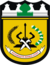

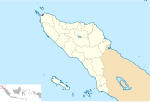

No.                                                                      19
Kabupaten/kota                                              Kota Banda Aceh
Ibu kota                                                                  -
Bupati/wali kota                                            Amiruddin (Pj.)
Luas wilayah (km2)[2]                                                 56,77
Jumlah penduduk (2022)                                              254.024
Kecamatan                                                                 9
Gampong                                                                  90
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 18, dtype: object


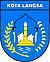

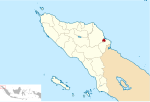

No.                                                                      20
Kabupaten/kota                                                  Kota Langsa
Ibu kota                                                                  -
Bupati/wali kota                                             Syaridin (Pj.)
Luas wilayah (km2)[2]                                                224,24
Jumlah penduduk (2022)                                              186.075
Kecamatan                                                                 5
Gampong                                                                  66
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 19, dtype: object


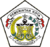

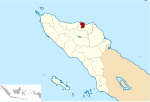

No.                                                                      21
Kabupaten/kota                                             Kota Lhokseumawe
Ibu kota                                                                  -
Bupati/wali kota                                             A. Hanan (Pj.)
Luas wilayah (km2)[2]                                                132,97
Jumlah penduduk (2022)                                              191.688
Kecamatan                                                                 4
Gampong                                                                  68
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 20, dtype: object


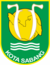

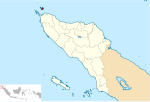

No.                                                                      22
Kabupaten/kota                                                  Kota Sabang
Ibu kota                                                                  -
Bupati/wali kota                                         Reza Fahlevi (Pj.)
Luas wilayah (km2)[2]                                                122,06
Jumlah penduduk (2022)                                               42.867
Kecamatan                                                                 3
Gampong                                                                  18
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 21, dtype: object


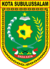

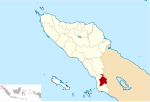

No.                                                                      23
Kabupaten/kota                                            Kota Subulussalam
Ibu kota                                                                  -
Bupati/wali kota                                       Affan Alfian Bintang
Luas wilayah (km2)[2]                                              1.183,60
Jumlah penduduk (2022)                                               96.296
Kecamatan                                                                 5
Gampong                                                                  82
Lambang                                                                    
Peta lokasi                                                                
Lambang URL               https://upload.wikimedia.org/wikipedia/commons...
Peta Lokasi URL           https://upload.wikimedia.org/wikipedia/commons...
Name: 22, dtype: object


In [219]:
# Function to display images inline in a Jupyter notebook
def display_images(df, image_columns):
    for index, row in df.iterrows():
        for image_column in image_columns:
            if row[image_column]:
                response = requests.get(row[image_column], stream=True)
                img = Image.open(response.raw)
                display(img)
        print(row)

# Display images
display_images(df, ['Lambang URL', 'Peta Lokasi URL'])

# Save DataFrame to CSV 
df.to_csv('Aceh.csv', index=False)

In [220]:
df = pd.read_csv('Aceh.csv')
df.head()

,No.,Kabupaten/kota,Ibu kota,Bupati/wali kota,Luas wilayah (km2)[2],Jumlah penduduk (2022),Kecamatan,Gampong,Lambang,Peta lokasi,Lambang URL,Peta Lokasi URL
0,1,Kabupaten Aceh Barat,Meulaboh,Mahdi Efendi (Pj.),"2.782,87",198.858,12,322,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
1,2,Kabupaten Aceh Barat Daya,Blangpidie,Darmansah (Pj.),"1.882,28",153.515,9,152,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
2,3,Kabupaten Aceh Besar,Kota Jantho,Muhammad Iswanto (Pj.),"2.891,48",422.241,23,604,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
3,4,Kabupaten Aceh Jaya,Calang,A. Murtala (Pj.),"3.872,35",96.049,9,172,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
4,5,Kabupaten Aceh Selatan,Tapak Tuan,Cut Syazalisma (Pj.),"4.175,38",234.169,18,260,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...


In [221]:
df.tail()

,No.,Kabupaten/kota,Ibu kota,Bupati/wali kota,Luas wilayah (km2)[2],Jumlah penduduk (2022),Kecamatan,Gampong,Lambang,Peta lokasi,Lambang URL,Peta Lokasi URL
18,19,Kota Banda Aceh,-,Amiruddin (Pj.),"56,77",254.024,9,90,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
19,20,Kota Langsa,-,Syaridin (Pj.),"224,24",186.075,5,66,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
20,21,Kota Lhokseumawe,-,A. Hanan (Pj.),"132,97",191.688,4,68,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
21,22,Kota Sabang,-,Reza Fahlevi (Pj.),"122,06",42.867,3,18,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
22,23,Kota Subulussalam,-,Affan Alfian Bintang,"1.183,60",96.296,5,82,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No.                     23 non-null     int64  
 1   Kabupaten/kota          23 non-null     object 
 2   Ibu kota                23 non-null     object 
 3   Bupati/wali kota        23 non-null     object 
 4   Luas wilayah (km2)[2]   23 non-null     object 
 5   Jumlah penduduk (2022)  23 non-null     float64
 6   Kecamatan               23 non-null     int64  
 7   Gampong                 23 non-null     int64  
 8   Lambang                 0 non-null      float64
 9   Peta lokasi             0 non-null      float64
 10  Lambang URL             23 non-null     object 
 11  Peta Lokasi URL         23 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 2.3+ KB


In [223]:
df.describe()

,No.,Jumlah penduduk (2022),Kecamatan,Gampong,Lambang,Peta lokasi
count,23.00000,23.000000,23.000000,23.000000,0.0,0.0
mean,12.00000,233.910304,12.608696,282.608696,NaN,NaN
std,6.78233,143.909556,6.686072,229.040238,NaN,NaN
min,1.00000,42.867000,3.000000,18.000000,NaN,NaN
25%,6.50000,141.594500,9.000000,126.000000,NaN,NaN
50%,12.00000,191.688000,11.000000,222.000000,NaN,NaN
75%,17.50000,277.912000,16.500000,353.500000,NaN,NaN
max,23.00000,609.705000,27.000000,852.000000,NaN,NaN


In [226]:
# Sort the DataFrame by 'Jumlah_penduduk_2022'
dfsort = df.sort_values(by='Jumlah penduduk (2022)')

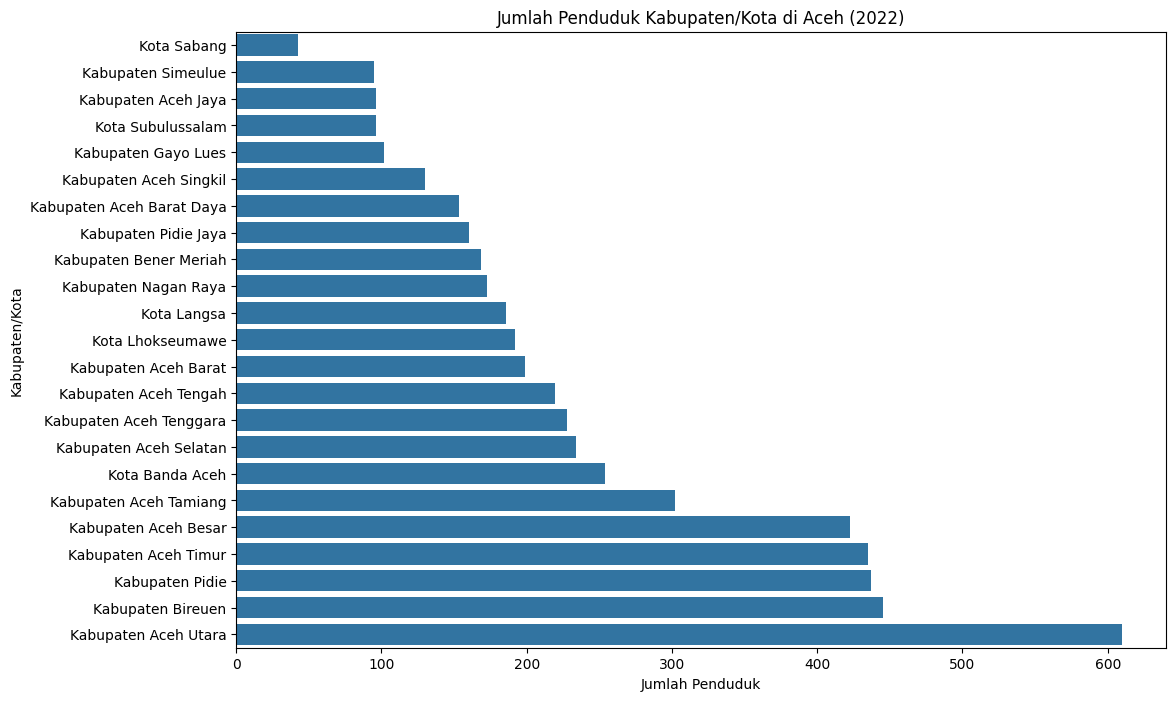

In [227]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Jumlah penduduk (2022)', y='Kabupaten/kota', data=dfsort)
plt.title('Jumlah Penduduk Kabupaten/Kota di Aceh (2022)')
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Kabupaten/Kota')
plt.show()